# 高阶操作

In [178]:
import tensorflow as tf

In [179]:
a = tf.random.normal([3,3])
a

<tf.Tensor: id=500, shape=(3, 3), dtype=float32, numpy=
array([[-0.05824086, -0.78557384, -0.2634449 ],
       [ 0.6118967 ,  1.0825266 ,  1.9889536 ],
       [-0.15768671,  2.181007  , -1.0034914 ]], dtype=float32)>

In [180]:
mask=a>0
mask

<tf.Tensor: id=502, shape=(3, 3), dtype=bool, numpy=
array([[False, False, False],
       [ True,  True,  True],
       [False,  True, False]])>

In [181]:
tf.boolean_mask(a,mask)

<tf.Tensor: id=529, shape=(4,), dtype=float32, numpy=array([0.6118967, 1.0825266, 1.9889536, 2.181007 ], dtype=float32)>

## 1.where 会返回bool为true的值的位置

In [182]:
indices = tf.where(mask)

In [183]:
tf.gather_nd(a,indices)

<tf.Tensor: id=531, shape=(4,), dtype=float32, numpy=array([0.6118967, 1.0825266, 1.9889536, 2.181007 ], dtype=float32)>

In [184]:
a = tf.random.uniform([3,4],maxval = 5,dtype = tf.int32)
a

<tf.Tensor: id=535, shape=(3, 4), dtype=int32, numpy=
array([[2, 0, 4, 3],
       [1, 4, 1, 4],
       [4, 3, 0, 1]])>

## 插播gather_nd的用法

In [185]:
tf.gather_nd(a,[[2,2],[1,2]])

<tf.Tensor: id=537, shape=(2,), dtype=int32, numpy=array([0, 1])>

In [186]:
tf.gather(a,[[2]])

<tf.Tensor: id=540, shape=(1, 1, 4), dtype=int32, numpy=array([[[4, 3, 0, 1]]])>

In [187]:
mask

<tf.Tensor: id=502, shape=(3, 3), dtype=bool, numpy=
array([[False, False, False],
       [ True,  True,  True],
       [False,  True, False]])>

In [188]:
a = tf.ones([3,3])

In [189]:
b = tf.zeros([3,3])

## 2.where(n,a,b)有3个输入时，代表true的值从a中取，false的值从b中取

In [190]:
tf.where(mask,a,b)

<tf.Tensor: id=547, shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [1., 1., 1.],
       [0., 1., 0.]], dtype=float32)>

## 3.scatter_nd的用法，在白板shape上将update的值填充进去

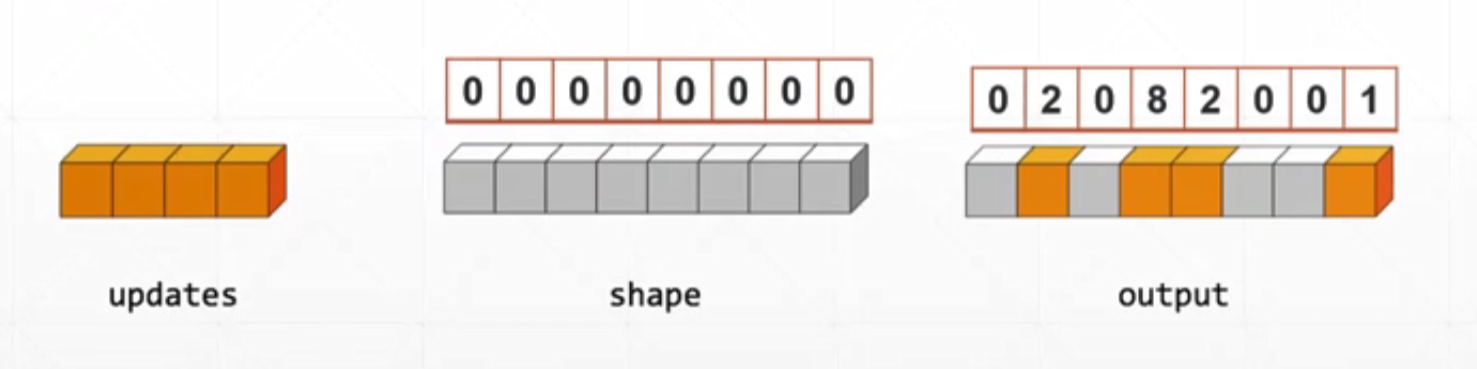

In [191]:
shape = tf.constant([8])#白板
shape

<tf.Tensor: id=548, shape=(1,), dtype=int32, numpy=array([8])>

In [192]:
updates = tf.constant([2,9,7])#要填充的值
updates

<tf.Tensor: id=549, shape=(3,), dtype=int32, numpy=array([2, 9, 7])>

In [193]:
indices = tf.constant([[1],[2],[3]])#填充的位置，要放在一起
indices

<tf.Tensor: id=550, shape=(3, 1), dtype=int32, numpy=
array([[1],
       [2],
       [3]])>

## 对于多维的scatter_nd

In [194]:
tf.scatter_nd(indices,updates,shape)

<tf.Tensor: id=551, shape=(8,), dtype=int32, numpy=array([0, 2, 9, 7, 0, 0, 0, 0])>

In [195]:
indices = tf.constant([[0],[2]])#[[0]]代表最高阶的维度，即选取两个[4,4],[4,4]，如下面插图所示

In [196]:
updates = tf.constant([   [[1,2,3,4],[1,2,3,4],
                          [1,2,3,4],[1,2,3,4]],
                          
                      
                         [[1,1,1,1],[1,1,1,1],
                         [1,1,1,1],[1,1,1,1]]    ])

In [197]:
shape = tf.constant([4,4,4])

In [198]:
tf.scatter_nd(indices,updates,shape)

<tf.Tensor: id=555, shape=(4, 4, 4), dtype=int32, numpy=
array([[[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]])>

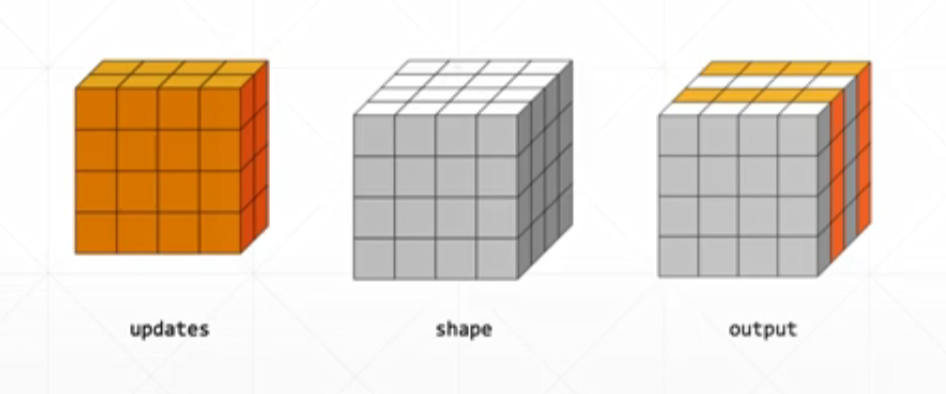

## 4.meshgrid 画point点

In [201]:
x = tf.linspace(-2.,2,5)
x

<tf.Tensor: id=566, shape=(5,), dtype=float32, numpy=array([-2., -1.,  0.,  1.,  2.], dtype=float32)>

In [203]:
y = tf.linspace(-2.,2,5)
y

<tf.Tensor: id=570, shape=(5,), dtype=float32, numpy=array([-2., -1.,  0.,  1.,  2.], dtype=float32)>

## 将x坐标y坐标分开存储

In [204]:
point_x,point_y = tf.meshgrid(x,y)

In [205]:
point_x

<tf.Tensor: id=588, shape=(5, 5), dtype=float32, numpy=
array([[-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.]], dtype=float32)>

In [206]:
point_y

<tf.Tensor: id=589, shape=(5, 5), dtype=float32, numpy=
array([[-2., -2., -2., -2., -2.],
       [-1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.]], dtype=float32)>

## 用tf.stack混合在一起得到每一个点的坐标易于理解

In [210]:
point = tf.stack([point_x,point_y],axis = 2)
point

<tf.Tensor: id=593, shape=(5, 5, 2), dtype=float32, numpy=
array([[[-2., -2.],
        [-1., -2.],
        [ 0., -2.],
        [ 1., -2.],
        [ 2., -2.]],

       [[-2., -1.],
        [-1., -1.],
        [ 0., -1.],
        [ 1., -1.],
        [ 2., -1.]],

       [[-2.,  0.],
        [-1.,  0.],
        [ 0.,  0.],
        [ 1.,  0.],
        [ 2.,  0.]],

       [[-2.,  1.],
        [-1.,  1.],
        [ 0.,  1.],
        [ 1.,  1.],
        [ 2.,  1.]],

       [[-2.,  2.],
        [-1.,  2.],
        [ 0.,  2.],
        [ 1.,  2.],
        [ 2.,  2.]]], dtype=float32)>